## **THE SPARKS FOUNDATION - GRIP TASK 1**


### Author: Kishan Gupta, Data Science and Business Analytics Internship -The Sparks Foundation

### Task 1: Predict the percentage score of a student based on number of study hours

In [24]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading Dataset

In [25]:
data="http://bit.ly/w-data"
mydata = pd.read_csv(data)
print(mydata.head())

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


In [26]:
mydata.shape

(25, 2)

In [27]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [28]:
#checking for missing values
mydata.isnull().sum()

Hours     0
Scores    0
dtype: int64

## Data Visualization

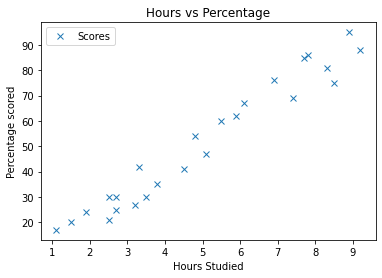

In [29]:
mydata.plot(x='Hours', y='Scores', style='x')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage scored')
plt.show()

**From the graph it is clear that as the hours studied increases percentage scored also increases i.e. there is positive relation between hours studied and percentage scored.**

## Preparing the Data

In [30]:
X=mydata.iloc[:,:-1].values
y=mydata.iloc[:,1].values

In [31]:
print(X)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


## Data Splitting

In [32]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

## Training the Model

In [33]:
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

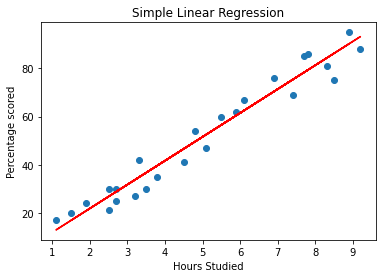

In [40]:
# Plotting the regression line
line = model.coef_*X+model.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color="red");
plt.title('Simple Linear Regression')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage scored')
plt.show()

## Test the Model

In [35]:
print(X_test) 
y_pred = model.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [36]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [37]:
# Making predictions for 9.25 hours studied per day
hours = 9.25
own_pred = model.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


**We used a Linear Regression Model to predict the score of a student if he/she studies for 9.25 hours/day and the Predicted Score came out to be 93.69.**

## Evaluating the Model
The final step is to Evaluate our Algorithm i.e. how well our model performs.For evaluting you can use any one of the three metrics. Here I have used Mean Absolute Error for evaluation.

In [38]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
